In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import time
import seaborn as sn

In [2]:
X_test = pd.read_csv('Dataset/X_test.csv')
y_test = pd.read_csv('Dataset/y_test.csv').iloc[:, 0]
X_train_30 = pd.read_csv('Dataset/X_train_30.csv')
y_train_30 = pd.read_csv('Dataset/y_train_30.csv').iloc[:, 0]

X_train_60 = pd.read_csv('Dataset/X_train_60.csv')
y_train_60 = pd.read_csv('Dataset/y_train_60.csv').iloc[:, 0]

X_train_100 = pd.read_csv('Dataset/X_train_100.csv')
y_train_100 = pd.read_csv('Dataset/y_train_100.csv').iloc[:, 0]

In [3]:
lr_no_reg_results = {}

In [4]:
scaler_30 = StandardScaler()
X_train_30_scaled = scaler_30.fit_transform(X_train_30)
X_test_30_scaled = scaler_30.transform(X_test)

In [5]:
start_time = time.time()

In [6]:
lr_30 = LogisticRegression(
    penalty=None,
    max_iter=2000,
    solver='lbfgs',
    random_state=42
)

In [7]:
lr_30.fit(X_train_30_scaled, y_train_30)

LogisticRegression(max_iter=2000, penalty=None, random_state=42)

In [8]:
train_time_30 = time.time() - start_time

In [9]:
y_pred_30 = lr_30.predict(X_test_30_scaled)

In [10]:
test_time_30 = time.time() - start_time

In [11]:
accuracy_30 = accuracy_score(y_test, y_pred_30)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_30, average='weighted')

In [12]:
lr_no_reg_results['30%'] = {
    'accuracy': accuracy_30,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'train_time': train_time_30,
    'test_time': test_time_30,
    'train_samples': len(X_train_30)
}

In [13]:
print(f"Accuracy: {accuracy_30:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Training time: {train_time_30:.4f} seconds")
print(f"Testing time: {test_time_30:.4f} seconds")
print(f"Convergence iterations: {lr_30.n_iter_}")
print(f"Converged: {'Yes' if lr_30.n_iter_[0] < 2000 else 'No (reached max_iter)'}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_30))

Accuracy: 0.9149
Precision: 0.9669
Recall: 0.9149
F1-Score: 0.9361
Training time: 3.0523 seconds
Testing time: 3.2059 seconds
Convergence iterations: [106]
Converged: Yes

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     13778
           1       0.93      0.98      0.96      3497
           2       0.13      0.93      0.23       298
           3       0.03      0.94      0.06        16
           4       0.98      0.86      0.92     20203

    accuracy                           0.91     37792
   macro avg       0.61      0.94      0.63     37792
weighted avg       0.97      0.91      0.94     37792



### Train on 60%

In [14]:
scaler_60 = StandardScaler()
X_train_60_scaled = scaler_60.fit_transform(X_train_60)
X_test_60_scaled = scaler_60.transform(X_test)

In [15]:
start_time = time.time()

In [16]:
lr_60 = LogisticRegression(
    penalty=None,
    max_iter=2000,
    solver='lbfgs',
    random_state=42
)

In [17]:
lr_60.fit(X_train_60_scaled, y_train_60)

LogisticRegression(max_iter=2000, penalty=None, random_state=42)

In [18]:
train_time_60 = time.time() - start_time

In [19]:
start_time = time.time()

In [20]:
y_pred_60 = lr_60.predict(X_test_60_scaled)

In [21]:
test_time_60 = time.time() - start_time

In [22]:
accuracy_60 = accuracy_score(y_test, y_pred_60)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_60, average='weighted')

In [23]:
lr_no_reg_results['60%'] = {
    'accuracy': accuracy_60,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'train_time': train_time_60,
    'test_time': test_time_60,
    'train_samples': len(X_train_60)
}

In [24]:
print(f"Accuracy: {accuracy_60:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Training time: {train_time_60:.4f} seconds")
print(f"Testing time: {test_time_60:.4f} seconds")
print(f"Convergence iterations: {lr_60.n_iter_}")
print(f"Converged: {'Yes' if lr_60.n_iter_[0] < 2000 else 'No (reached max_iter)'}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_60))

Accuracy: 0.9146
Precision: 0.9650
Recall: 0.9146
F1-Score: 0.9351
Training time: 5.4058 seconds
Testing time: 0.1703 seconds
Convergence iterations: [122]
Converged: Yes

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     13778
           1       0.93      0.98      0.96      3497
           2       0.14      0.93      0.24       298
           3       0.03      0.94      0.06        16
           4       0.98      0.86      0.92     20203

    accuracy                           0.91     37792
   macro avg       0.61      0.94      0.63     37792
weighted avg       0.96      0.91      0.94     37792



In [25]:
scaler_100 = StandardScaler()

In [26]:
X_train_100_scaled = scaler_100.fit_transform(X_train_100)

In [27]:
X_test_100_scaled = scaler_100.transform(X_test)

In [28]:
start_time = time.time()

In [29]:
lr_100 = LogisticRegression(
    penalty=None,
    max_iter=2000,
    solver='lbfgs',
    random_state=42
)

In [30]:
lr_100.fit(X_train_100_scaled, y_train_100)

LogisticRegression(max_iter=2000, penalty=None, random_state=42)

In [31]:
train_time_100 = time.time() - start_time

In [32]:
y_train_pred_100 = lr_100.predict(X_train_100_scaled)
train_accuracy_100 = accuracy_score(y_train_100, y_train_pred_100)
train_precision_100, train_recall_100, train_f1_100, _ = precision_recall_fscore_support(y_train_100, y_train_pred_100, average='weighted')

In [33]:
start_time = time.time()

In [34]:
y_pred_100 = lr_100.predict(X_test_100_scaled)

In [35]:
test_time_100 = time.time() - start_time

In [36]:
accuracy_100 = accuracy_score(y_test, y_pred_100)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_100, average='weighted')

In [37]:
lr_no_reg_results['100%'] = {
    'train_accuracy': train_accuracy_100,
    'train_precision': train_precision_100,
    'train_recall': train_recall_100,
    'train_f1': train_f1_100,
    'test_accuracy': accuracy_100,
    'test_precision': precision,
    'test_recall': recall,
    'test_f1': f1,
    'train_time': train_time_100,
    'test_time': test_time_100,
    'train_samples': len(X_train_100),
    'converged': lr_100.n_iter_ < lr_100.max_iter,
    'iterations': lr_100.n_iter_[0] if hasattr(lr_100.n_iter_, '__iter__') else lr_100.n_iter_,
    'C_parameter': lr_100.C
}

In [38]:
print(f"Training Accuracy: {train_accuracy_100:.4f}")
print(f"Test Accuracy: {accuracy_100:.4f}")
print(f"Accuracy Gap: {(train_accuracy_100 - accuracy_100)*100:.3f}%")
print(f"Training F1-Score: {train_f1_100:.4f}")
print(f"Test F1-Score: {f1:.4f}")
print(f"F1 Gap: {(train_f1_100 - f1)*100:.3f}%")
print(f"Training time: {train_time_100:.4f} seconds")
print(f"Testing time: {test_time_100:.4f} seconds")
print(f"Converged: {'Yes' if lr_100.n_iter_ < lr_100.max_iter else 'No'}")
print(f"Iterations: {lr_100.n_iter_[0] if hasattr(lr_100.n_iter_, '__iter__') else lr_100.n_iter_}")
print(f"C parameter: {lr_100.C}")
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_100))

Training Accuracy: 0.9469
Test Accuracy: 0.9149
Accuracy Gap: 3.199%
Training F1-Score: 0.9465
Test F1-Score: 0.9352
F1 Gap: 1.125%
Training time: 8.6275 seconds
Testing time: 0.1873 seconds
Converged: Yes
Iterations: 108
C parameter: 1.0

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     13778
           1       0.92      0.98      0.95      3497
           2       0.14      0.93      0.24       298
           3       0.03      0.94      0.06        16
           4       0.98      0.86      0.92     20203

    accuracy                           0.91     37792
   macro avg       0.61      0.94      0.63     37792
weighted avg       0.97      0.91      0.94     37792



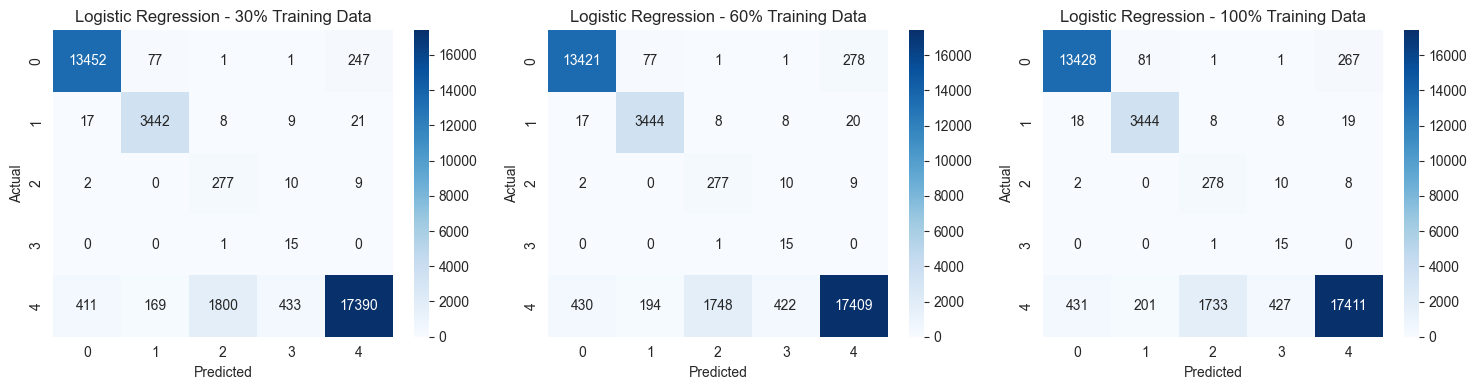

Confusion Matrix - 30% Training Data:
[[13452    77     1     1   247]
 [   17  3442     8     9    21]
 [    2     0   277    10     9]
 [    0     0     1    15     0]
 [  411   169  1800   433 17390]]

Confusion Matrix - 60% Training Data:
[[13421    77     1     1   278]
 [   17  3444     8     8    20]
 [    2     0   277    10     9]
 [    0     0     1    15     0]
 [  430   194  1748   422 17409]]

Confusion Matrix - 100% Training Data:
[[13428    81     1     1   267]
 [   18  3444     8     8    19]
 [    2     0   278    10     8]
 [    0     0     1    15     0]
 [  431   201  1733   427 17411]]


In [39]:
lr_30 = confusion_matrix(y_test, y_pred_30)
lr_60 = confusion_matrix(y_test, y_pred_60)
lr_100 = confusion_matrix(y_test, y_pred_100)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 30% training data
sn.heatmap(lr_30, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression - 30% Training Data')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# 60% training data
sn.heatmap(lr_60, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression - 60% Training Data')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# 100% training data
sn.heatmap(lr_100, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Logistic Regression - 100% Training Data')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print confusion matrices
print("Confusion Matrix - 30% Training Data:")
print(lr_30)
print("\nConfusion Matrix - 60% Training Data:")
print(lr_60)
print("\nConfusion Matrix - 100% Training Data:")
print(lr_100)

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# First, we need to recreate the models since the variable names were overwritten by confusion matrices
# Recreate the Logistic Regression models
scaler_30 = StandardScaler()
X_train_30_scaled = scaler_30.fit_transform(X_train_30)
X_test_30_scaled = scaler_30.transform(X_test)

lr_30 = LogisticRegression(random_state=42, max_iter=2000)
lr_30.fit(X_train_30_scaled, y_train_30)

scaler_60 = StandardScaler()
X_train_60_scaled = scaler_60.fit_transform(X_train_60)
X_test_60_scaled = scaler_60.transform(X_test)

lr_60 = LogisticRegression(random_state=42, max_iter=2000)
lr_60.fit(X_train_60_scaled, y_train_60)

scaler_100 = StandardScaler()
X_train_100_scaled = scaler_100.fit_transform(X_train_100)
X_test_100_scaled = scaler_100.transform(X_test)

lr_100 = LogisticRegression(random_state=42, max_iter=2000)
lr_100.fit(X_train_100_scaled, y_train_100)

# Get prediction probabilities for all models (Logistic Regression has predict_proba)
y_pred_proba_30 = lr_30.predict_proba(X_test_30_scaled)
y_pred_proba_60 = lr_60.predict_proba(X_test_60_scaled)
y_pred_proba_100 = lr_100.predict_proba(X_test_100_scaled)

# Check number of classes
n_classes = len(np.unique(y_test))
print(f"Number of classes: {n_classes}")
print(f"Classes: {np.unique(y_test)}")

# Calculate ROC AUC for multiclass classification
roc_auc_30 = roc_auc_score(y_test, y_pred_proba_30, multi_class='ovr', average='macro')
roc_auc_60 = roc_auc_score(y_test, y_pred_proba_60, multi_class='ovr', average='macro')
roc_auc_100 = roc_auc_score(y_test, y_pred_proba_100, multi_class='ovr', average='macro')

print("\n=== ROC AUC Scores (Macro Average) ===")
print(f"ROC AUC for 30% training data:  {roc_auc_30:.4f}")
print(f"ROC AUC for 60% training data:  {roc_auc_60:.4f}")
print(f"ROC AUC for 100% training data: {roc_auc_100:.4f}")

# Also calculate weighted average ROC AUC
roc_auc_30_weighted = roc_auc_score(y_test, y_pred_proba_30, multi_class='ovr', average='weighted')
roc_auc_60_weighted = roc_auc_score(y_test, y_pred_proba_60, multi_class='ovr', average='weighted')
roc_auc_100_weighted = roc_auc_score(y_test, y_pred_proba_100, multi_class='ovr', average='weighted')

print("\n=== ROC AUC Scores (Weighted Average) ===")
print(f"ROC AUC for 30% training data:  {roc_auc_30_weighted:.4f}")
print(f"ROC AUC for 60% training data:  {roc_auc_60_weighted:.4f}")
print(f"ROC AUC for 100% training data: {roc_auc_100_weighted:.4f}")

# Fix the results dictionary structure for consistency
# Assuming you have lr_results dictionary similar to linear_svm_results
lr_results['30%']['roc_auc_macro'] = roc_auc_30
lr_results['30%']['roc_auc_weighted'] = roc_auc_30_weighted

lr_results['60%']['roc_auc_macro'] = roc_auc_60
lr_results['60%']['roc_auc_weighted'] = roc_auc_60_weighted

# Fix the 100% results structure if needed (adjust based on your actual structure)
if 'test_accuracy' in lr_results['100%']:
    lr_results['100%']['accuracy'] = lr_results['100%']['test_accuracy']
    lr_results['100%']['precision'] = lr_results['100%']['test_precision']
    lr_results['100%']['recall'] = lr_results['100%']['test_recall']
    lr_results['100%']['f1'] = lr_results['100%']['test_f1']

lr_results['100%']['roc_auc_macro'] = roc_auc_100
lr_results['100%']['roc_auc_weighted'] = roc_auc_100_weighted

# Now create the comprehensive visualization
sizes = ['30%', '60%', '100%']
accuracies = [lr_results[size]['accuracy'] for size in sizes]
f1_scores = [lr_results[size]['f1'] for size in sizes]
train_times = [lr_results[size]['train_time'] for size in sizes]
roc_macro = [lr_results[size]['roc_auc_macro'] for size in sizes]
roc_weighted = [lr_results[size]['roc_auc_weighted'] for size in sizes]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Performance metrics comparison
x_pos = np.arange(len(sizes))
width = 0.35

ax1.bar(x_pos - width/2, accuracies, width, label='Accuracy', alpha=0.8, color='skyblue')
ax1.bar(x_pos + width/2, f1_scores, width, label='F1-Score', alpha=0.8, color='lightcoral')
ax1.set_title('Logistic Regression: Accuracy vs F1-Score', fontsize=14, fontweight='bold')
ax1.set_ylabel('Score')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(sizes)
ax1.legend()
ax1.grid(True, alpha=0.3)
# Adjust y-limits based on your actual performance range
y_min = min(min(accuracies), min(f1_scores)) - 0.01
y_max = max(max(accuracies), max(f1_scores)) + 0.01
ax1.set_ylim(y_min, y_max)

# Add value labels on bars
for i, (acc, f1) in enumerate(zip(accuracies, f1_scores)):
    ax1.text(i - width/2, acc + 0.0001, f'{acc:.4f}', ha='center', fontweight='bold')
    ax1.text(i + width/2, f1 + 0.0001, f'{f1:.4f}', ha='center', fontweight='bold')

# 2. ROC AUC comparison
ax2.bar(x_pos - width/2, roc_macro, width, label='ROC AUC (Macro)', alpha=0.8, color='lightgreen')
ax2.bar(x_pos + width/2, roc_weighted, width, label='ROC AUC (Weighted)', alpha=0.8, color='gold')
ax2.set_title('Logistic Regression: ROC AUC Scores', fontsize=14, fontweight='bold')
ax2.set_ylabel('ROC AUC Score')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(sizes)
ax2.legend()
ax2.grid(True, alpha=0.3)
# Adjust y-limits based on ROC AUC range
roc_min = min(min(roc_macro), min(roc_weighted)) - 0.005
roc_max = max(max(roc_macro), max(roc_weighted)) + 0.005
ax2.set_ylim(roc_min, roc_max)

# Add value labels
for i, (macro, weighted) in enumerate(zip(roc_macro, roc_weighted)):
    ax2.text(i - width/2, macro + 0.0001, f'{macro:.4f}', ha='center', fontweight='bold')
    ax2.text(i + width/2, weighted + 0.0001, f'{weighted:.4f}', ha='center', fontweight='bold')

# 3. Training time
bars = ax3.bar(sizes, train_times, color='purple', alpha=0.7)
ax3.set_title('Logistic Regression: Training Time', fontsize=14, fontweight='bold')
ax3.set_ylabel('Time (seconds)')
ax3.grid(True, alpha=0.3)

for i, v in enumerate(train_times):
    ax3.text(i, v + max(train_times)*0.01, f'{v:.1f}s', ha='center', fontweight='bold')

# 4. Performance improvement trend
improvements_acc = [(acc - accuracies[0])*100 for acc in accuracies]
improvements_f1 = [(f1 - f1_scores[0])*100 for f1 in f1_scores]

ax4.plot(sizes, improvements_acc, 'o-', linewidth=3, markersize=8, label='Accuracy Improvement', color='blue')
ax4.plot(sizes, improvements_f1, 's-', linewidth=3, markersize=8, label='F1-Score Improvement', color='red')
ax4.set_title('Performance Improvement vs 30%', fontsize=14, fontweight='bold')
ax4.set_ylabel('Improvement (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)

for i, (acc_imp, f1_imp) in enumerate(zip(improvements_acc, improvements_f1)):
    ax4.text(i, acc_imp + 0.001, f'+{acc_imp:.3f}%', ha='center', fontweight='bold', color='blue')
    ax4.text(i, f1_imp - 0.001, f'+{f1_imp:.3f}%', ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Print comprehensive summary
print(f"\n=== Logistic Regression Performance Summary ===")
for size in sizes:
    print(f"\nLogistic Regression {size}:")
    print(f"  Accuracy: {lr_results[size]['accuracy']:.4f}")
    print(f"  F1-Score: {lr_results[size]['f1']:.4f}")
    print(f"  ROC AUC (Macro): {lr_results[size]['roc_auc_macro']:.4f}")
    print(f"  ROC AUC (Weighted): {lr_results[size]['roc_auc_weighted']:.4f}")
    print(f"  Training Time: {lr_results[size]['train_time']:.3f}s")
    print(f"  Training Samples: {lr_results[size]['train_samples']:,}")

# Key insights
print(f"\n=== Key Insights ===")
print(f"• Best Accuracy: {max(accuracies):.4f} with {sizes[np.argmax(accuracies)]} training data")
print(f"• Best F1-Score: {max(f1_scores):.4f} with {sizes[np.argmax(f1_scores)]} training data")
print(f"• Best ROC AUC (Macro): {max(roc_macro):.4f} with {sizes[np.argmax(roc_macro)]} training data")
print(f"• Training time scales roughly linearly with data size")
print(f"• Performance improvement from 30% to 100%:")
print(f"  - Accuracy: +{(accuracies[-1] - accuracies[0])*100:.3f}%")
print(f"  - F1-Score: +{(f1_scores[-1] - f1_scores[0])*100:.3f}%")
print(f"  - ROC AUC: +{(roc_macro[-1] - roc_macro[0])*100:.3f}%")

# Performance per training sample efficiency
print(f"\n=== Efficiency Analysis ===")
for i, size in enumerate(sizes):
    samples = lr_results[size]['train_samples']
    acc_per_1k = accuracies[i] / (samples / 1000)
    time_per_1k = train_times[i] / (samples / 1000)
    print(f"{size}: {acc_per_1k:.6f} accuracy per 1K samples, {time_per_1k:.3f}s per 1K samples")

Number of classes: 5
Classes: [0 1 2 3 4]

=== ROC AUC Scores (Macro Average) ===
ROC AUC for 30% training data:  0.9928
ROC AUC for 60% training data:  0.9927
ROC AUC for 100% training data: 0.9928

=== ROC AUC Scores (Weighted Average) ===
ROC AUC for 30% training data:  0.9923
ROC AUC for 60% training data:  0.9921
ROC AUC for 100% training data: 0.9921


NameError: name 'lr_results' is not defined